# AB test Analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

%matplotlib inline

In [32]:
# Dataset:
df_final = pd.read_csv('../data/clean/df_final_AB_test_dataset', sep=',')

In [34]:
df_final.shape

(317235, 14)

In [36]:
# Analyze the user interactions for each step across the two variations: Control and Test

# Group by 'variation' and 'process_step' and then count the occurrences
interactions_counts = df_final.groupby(['Variation', 'process_step']).size().unstack()

# Display the resulting table
display(interactions_counts)

process_step,confirm,start,step_1,step_2,step_3
Variation,,,,,
Control,17336,45380,29544,25773,22503
Test,25600,55773,38666,30899,25761


## Funnel Analysis

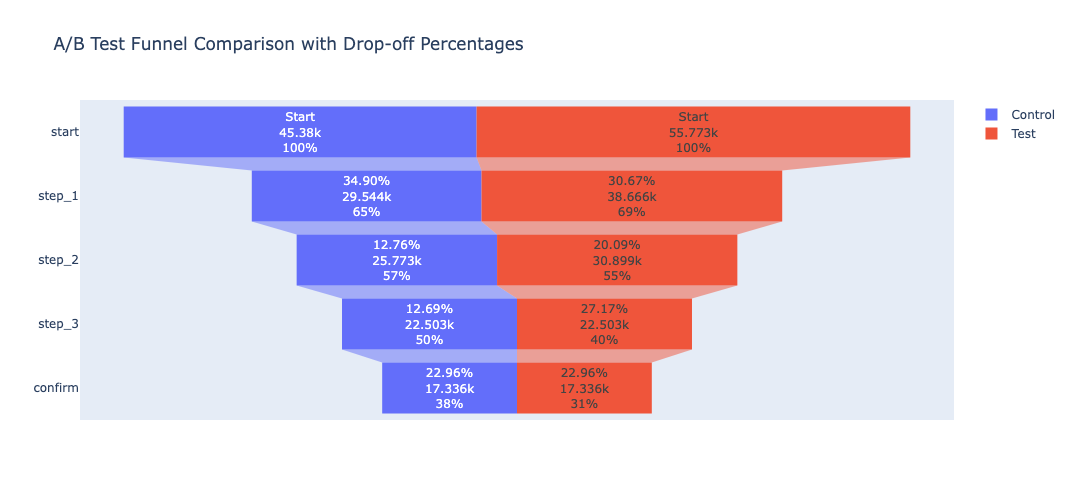

In [38]:
# Function to calculate drop-off percentages
def calculate_dropoff_percentages(funnel):
    dropoffs = []
    for i in range(1, len(funnel)):
        dropoff = (funnel[i-1] - funnel[i]) / funnel[i-1] * 100
        dropoffs.append(f"{dropoff:.2f}%")
    dropoffs.insert(0, "Start")  # No drop-off for the first step
    return dropoffs

# Data
stages = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
control = [45380, 29544, 25773, 22503, 17336]  # Funnel A
test = [55773, 38666, 30899, 22503, 17336]    # Funnel B

# Calculate drop-off percentages
control_dropoffs = calculate_dropoff_percentages(control)
test_dropoffs = calculate_dropoff_percentages(test)

# Create the funnel chart with larger figure size
fig = go.Figure()

# Funnel A with larger drop-off percentages inside the funnel
fig.add_trace(go.Funnel(
    name='Control',
    y=stages,
    x=control,
    text=control_dropoffs,
    textinfo="text+value+percent initial",
    textposition="inside",
    textfont=dict(size=16)  # Increase font size specifically for inside funnel
))

# Funnel B with larger drop-off percentages inside the funnel
fig.add_trace(go.Funnel(
    name='Test',
    y=stages,
    x=test,
    text=test_dropoffs,
    textinfo="text+value+percent initial",
    textposition="inside",
    textfont=dict(size=16)  # Increase font size specifically for inside funnel
))

# Increase the size of the figure to allow more space for text
fig.update_layout(
    title="A/B Test Funnel Comparison with Drop-off Percentages",
    height=500,  # Increase height to make more room
    width=900   # Increase width if necessary
)

fig.show()

### Stage-by-Stage review
##### Control Group (Blue): Represents the performance of the original version.
##### Test Group (Red): Represents the performance of the new version being tested.

0. Start:
   - _Control_: 45,380 users (100%)
   - _Test_: 55,773 users (100%)

   _Analysis_: The test group started with more users than the control group. This difference might be due to traffic variations or other external factors that should be taken into account when interpreting the results.

2. Step 1:
   - _Control_: 29,544 users (65%) – 34.90% drop-off
   - _Test_: 38,666 users (69%) – 30.67% drop-off
   
   _Analysis_: The test group has a smaller drop-off percentage at this step compared to the control group, indicating that the test variant is slightly more effective in retaining users through the first step.

3. Step 2:
   - Control: 25,773 users (57%) – 12.76% drop-off from Step 1
   - Test: 30,899 users (55%) – 20.09% drop-off from Step 1
   
   Analysis: The control group performs better at this stage, with a lower drop-off rate. The test group experiences a significant drop-off (20.09%), suggesting that users might be encountering friction or dissatisfaction at this point.

4. Step 3:
   - Control: 22,503 users (50%) – 12.69% drop-off from Step 2
   - Test: 22,503 users (40%) – 27.17% drop-off from Step 2
   
   Analysis: The drop-off in the test group is considerably higher than in the control group at this stage. This suggests that the changes made in the test variant may be causing users to leave the funnel at this point.

5. Confirm (Final Step):
   - Control: 17,336 users (38%) – 22.96% drop-off from Step 3
   - Test: 17,336 users (31%) – 22.96% drop-off from Step 3
   
   Analysis: Both the control and test groups have the same absolute number of users reaching the final step, and the drop-off percentages are identical. This indicates that users who reach Step 3 are equally likely to convert in both variants.

#### Key Insights
* Initial Retention (Step 1): The test variant outperforms the control variant in retaining users at the first step, which is a positive sign.
* Middle Funnel Performance (Step 2 and Step 3): The test variant has significantly higher drop-off rates in the middle stages of the funnel, indicating potential issues or friction introduced by the changes in the test variant.
* Final Conversion (Confirm Step): Despite the higher drop-offs in the middle stages, the final conversion rates are equal in absolute numbers, suggesting that users who progress to the final stages are committed to completing the funnel regardless of the variant.


#### Recommendations
Investigate Drop-offs at Step 2 and Step 3: The higher drop-offs in the test variant during these stages should be closely examined. There might be elements or steps introduced in the test variant that are causing user friction or confusion.

Optimize Early and Middle Stages: Focus on improving user experience in the earlier and middle steps of the test funnel, where the higher drop-offs occur. This could involve simplifying the process, clarifying instructions, or addressing potential issues identified through user feedback or analytics.

Consider Overall Impact: Despite the differences in drop-offs, the final conversion numbers are the same. 
We may prioritize the early retention gains of the test variant or work on mitigating the middle-stage drop-offs before deciding which version to implement.